In [1]:
import numpy as np
from PIL import Image
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import importlib
from datetime import datetime
import os
import lenser_v5 as lenser

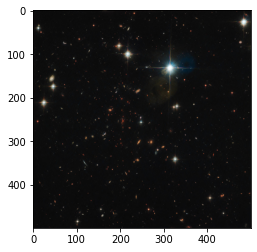

In [57]:
# the width of the image in pixels
pixels = 500
# the width of the image in arcseconds
image_size = 100 * u.arcsec

# a scale parameter used for conversion between pixels and arcseconds
pixel_size = image_size / pixels

# choose what image we want to lens, put it in a nice format, and display
im = Image.open('./test_images/test_image_20.jpg').convert('RGB') #Opens a picture in grayscale
im = im.resize((pixels,pixels))
test_image = np.array(im)
plt.imshow(test_image)
im.close()

In [58]:
importlib.reload(lenser)

<module 'lenser_v5' from '/home/lars/Astro425-A20/Final_Project/lenser_v5.py'>

In [ ]:
x = 0    # lens x location in arcseconds
y = 0    # lens y location in arcseconds
minimum_normalized_angle = 0.0

test_lens = lenser.Lens(source_image=test_image,
                        lens_x=x, lens_y=y,
                        pixel_size=pixel_size,
                        min_normalized_angle=minimum_normalized_angle)
test_lens.deflect(method=2, verbosity=1)

now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H-%M-%S")
np.save("./test_results/"+dt_string+".npy", test_lens.result)

now at j : 0
now at j : 50
now at j : 100
now at j : 150


In [ ]:
fig = test_lens.draw(do_circle=True, do_log_scale=True)

now = datetime.now()
dt_string = now.strftime("%Y-%m-%d_%H-%M-%S")
plt.savefig("./test_results/" + dt_string + ".png")

In [ ]:
name = 'gif_6'
direcory = './' + name + '/'

frame_num = 0
for loc in np.linspace(-40, 40, 40):
    # make the frame name easily sortable for later
    if (frame_num < 10):
        frame_name = '0' + str(frame_num)
    else:
        frame_name = str(frame_num)

    # process this frame
    print("frame {0} at θ = {1} arcseconds".format(frame_name, loc))
    gif_lens = lenser.Lens(source_image=test_image,
                           lensLoc=(loc, loc),
                           pixel_size=pixel_size,
                          min_normalized_angle=0.01)
    gif_lens.deflect(method=2, verbosity=0)
    fig = gif_lens.draw(do_circle=True, do_log_scale=False)
    plt.savefig(directory + "frame_" + frame_name + ".jpg")
    plt.close()
    fig = gif_lens.draw(do_circle=False, do_log_scale=False)
    plt.savefig(directory + "zframe_" + frame_name + ".jpg")
    plt.close()
    frame_num += 1
    print("complete")

# go through each frame, make a list
images = []
files = os.listdir(directory)
files.sort()
for files in files:
    if(file[0] != "f"):
        continue
    im = Image.open(directory + file)
    images.append(im)

# turn the list into a gif
images[0].save('./' + name + '.gif',
               save_all=True, append_images=images[1:],
               optimize=False, duration=80, loop=0)
